<a href="https://colab.research.google.com/github/satyhim/Machine_Learning/blob/main/Homework_Stacking_Ensembling1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stacking

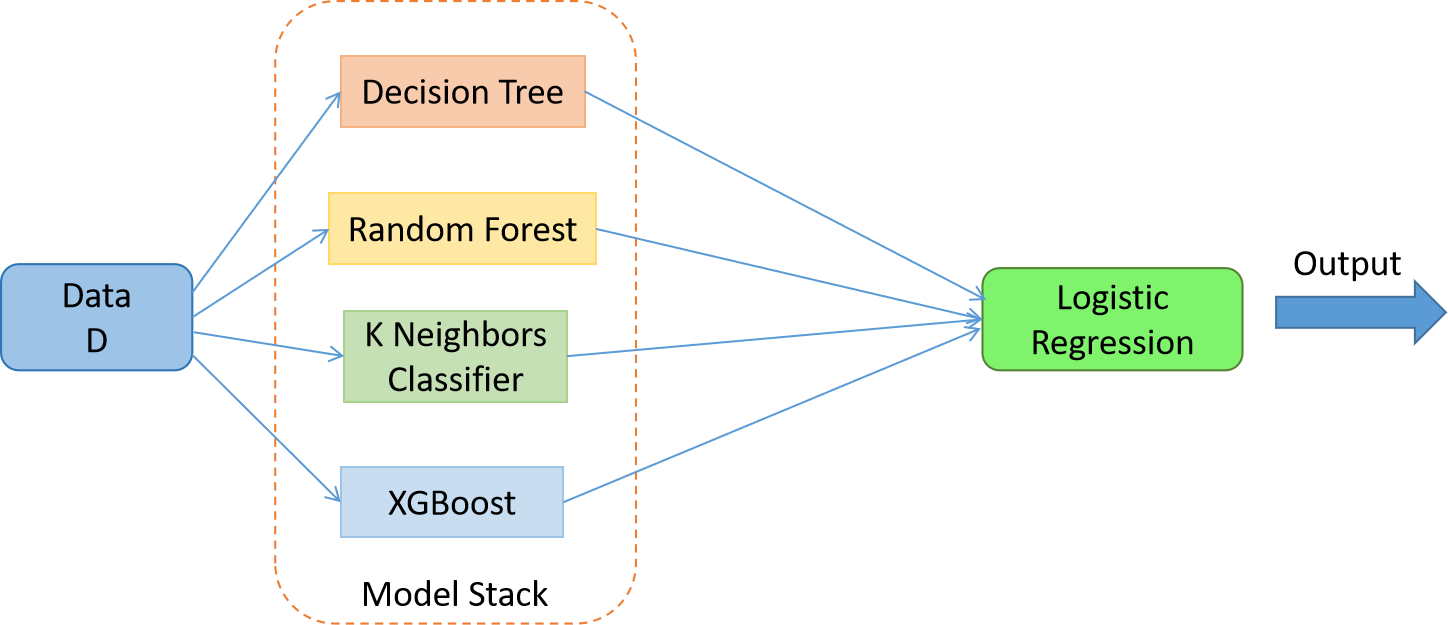

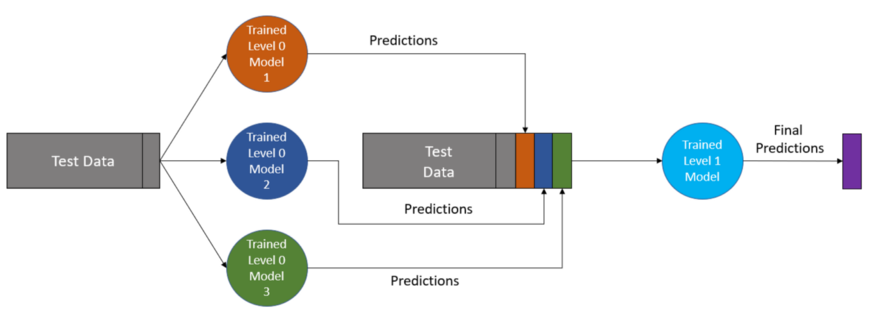

In [147]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import GaussianNB

In [148]:
df= pd.read_excel('/content/drive/MyDrive/Python/Project/seeds_dataset.xlsx')

In [149]:
df.head()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry coefficient,Length of kernel groove,Class (1_2_3
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [150]:
# importing libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import os
np.random.seed(0)

In [151]:
X = df.drop(['Class (1_2_3'], axis=1)

y = df['Class (1_2_3']

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle=True, random_state=None)

In [166]:
def Stacking(model,train,y,test,n_fold):
   folds=StratifiedKFold(n_splits=n_fold,random_state=1)
   test_pred=np.empty((test.shape[0],1),float)
   train_pred=np.empty((0,1),float)
   for train_indices,val_indices in folds.split(train,y.values):
      x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
      y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]

      model.fit(X=x_train,y=y_train)
      train_pred=np.append(train_pred,model.predict(x_val))
      test_pred=np.append(test_pred,model.predict(test))
      return test_pred.reshape(-1,1),train_pred

In [170]:
from sklearn.ensemble import StackingClassifier
model1 = tree.DecisionTreeClassifier(random_state=1)

test_pred1 ,train_pred1=Stacking(model=model1,n_fold=10, train=X_train,test=X_test,y=y_train)

train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)

ValueError: ignored